**Data Analysis Comparing room_type and price from AB_NYC_2019**

In [ ]:
# Cleaning up dataset

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv("AB_NYC_2019.csv")

print(df['room_type'].unique())

df['room_type'] = df['room_type'].str.strip()
df['room_type'] = df['room_type'].str.lower()

df.isnull().sum()
df = df.dropna(subset=['price', 'room_type'])


room_type_price_stats = df.groupby('room_type')['price'].describe()
room_type_price_stats

['Private room' 'Entire home/apt' 'Shared room']


,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
entire home/apt,25409.0,211.794246,284.041611,0.0,120.0,160.0,229.0,10000.0
private room,22326.0,89.780973,160.205262,0.0,50.0,70.0,95.0,10000.0
shared room,1160.0,70.127586,101.725252,0.0,33.0,45.0,75.0,1800.0


In [ ]:
# Statistical Analysis of room_type and price

df = pd.read_csv("AB_NYC_2019.csv")

print(df[['room_type', 'price']].isnull().sum())

room_type_price_stats = df.groupby('room_type')['price'].describe()

print(room_type_price_stats)


room_type    0
price        0
dtype: int64
                   count        mean         std  min    25%    50%    75%  \
room_type                                                                    
Entire home/apt  25409.0  211.794246  284.041611  0.0  120.0  160.0  229.0   
Private room     22326.0   89.780973  160.205262  0.0   50.0   70.0   95.0   
Shared room       1160.0   70.127586  101.725252  0.0   33.0   45.0   75.0   

                     max  
room_type                 
Entire home/apt  10000.0  
Private room     10000.0  
Shared room       1800.0  


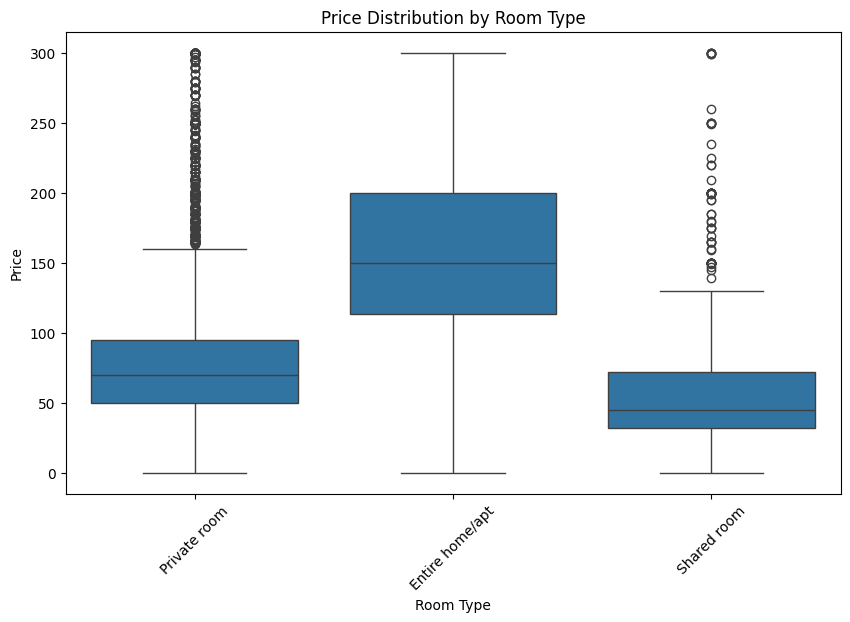

In [ ]:
# 1. Box plot to compare price distribution by room_type

df = df[df['price'] <= 300]
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()



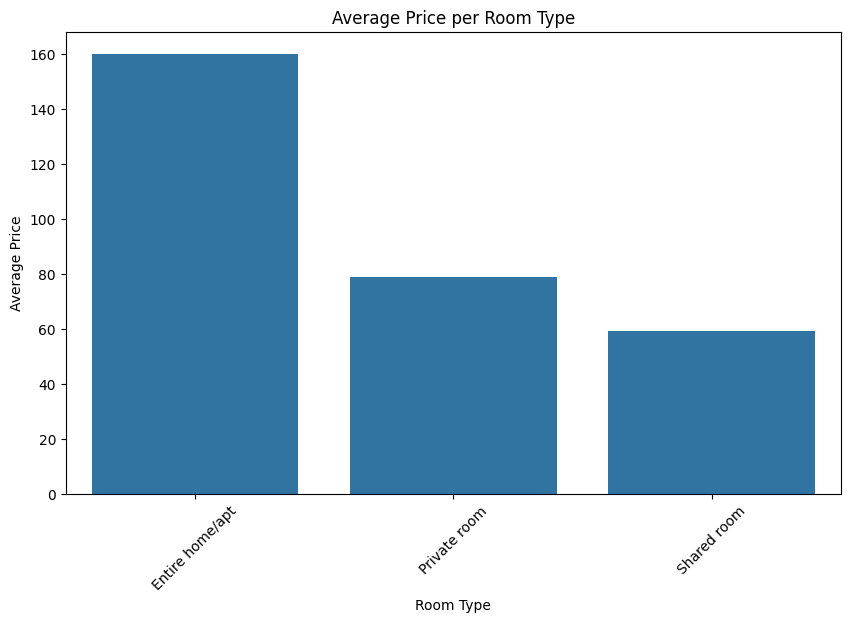

In [ ]:
# 2. Bar plot for average price per room type

avg_price_per_room = df.groupby('room_type')['price'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_per_room.index, y=avg_price_per_room.values)
plt.title('Average Price per Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

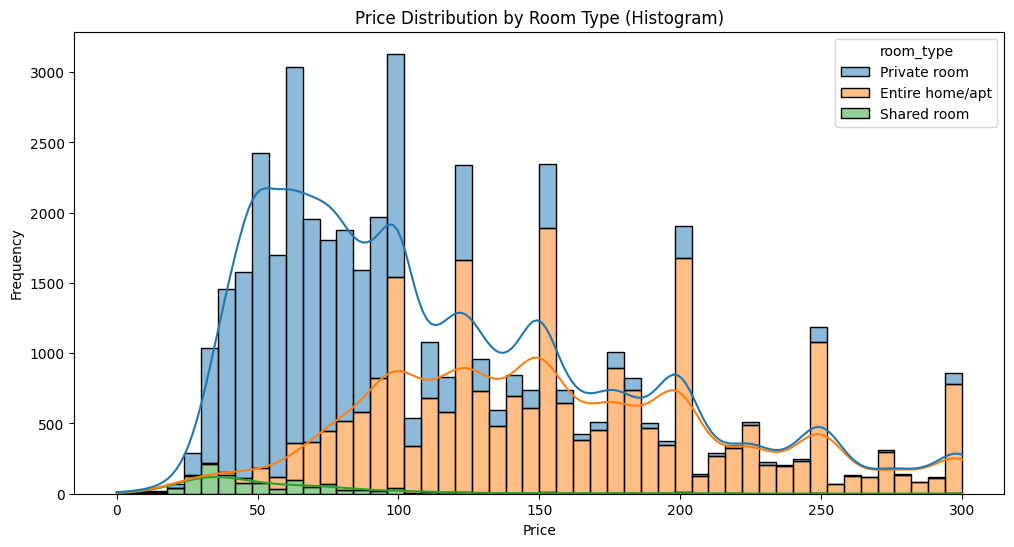

In [ ]:
# 3. Histogram of prices by room type

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='price', hue='room_type', kde=True, multiple="stack", bins=50)
plt.title('Price Distribution by Room Type (Histogram)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


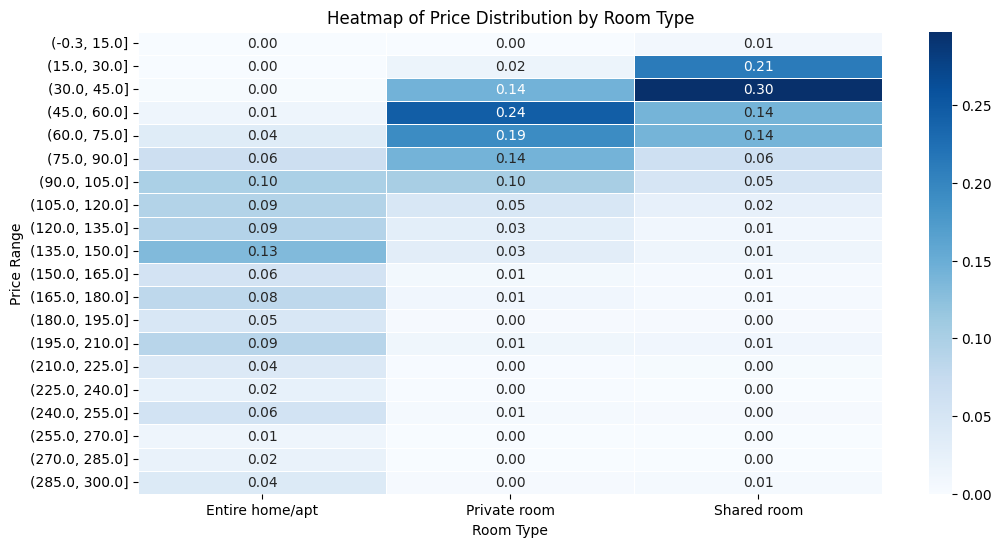

In [ ]:
# 4. Pivot table to create a heatmap of price distribution by room type and price bin

price_bins = pd.cut(df['price'], bins=20)

price_bin_room_type = pd.crosstab(price_bins, df['room_type'], normalize='columns')

plt.figure(figsize=(12, 6))
sns.heatmap(price_bin_room_type, cmap='Blues', annot=True, fmt='.2f', linewidths=.5)
plt.title('Heatmap of Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price Range')
plt.show()


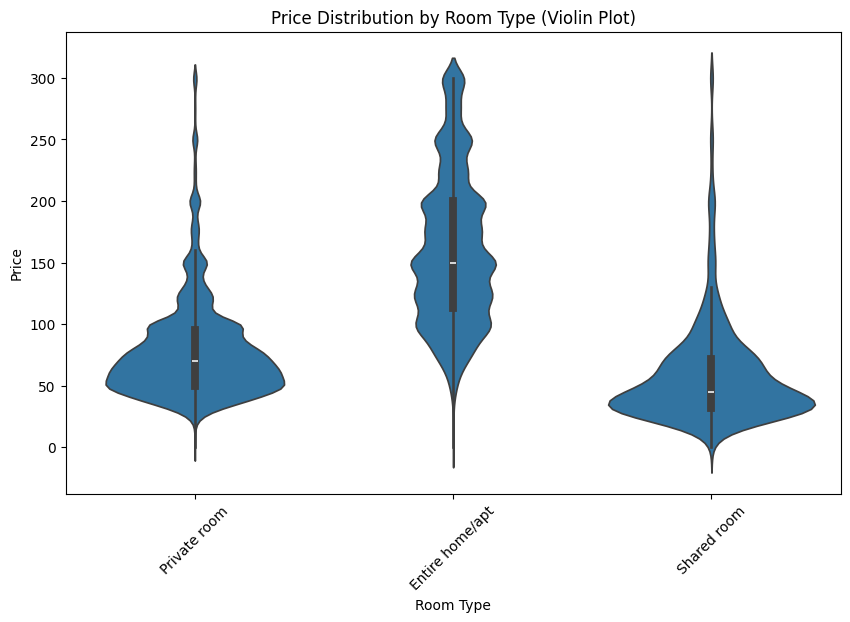

In [ ]:
# 5. Violin plot for price distribution by room type

plt.figure(figsize=(10, 6))
sns.violinplot(x='room_type', y='price', data=df)
plt.title('Price Distribution by Room Type (Violin Plot)')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


                mean  count
cluster                    
0         120.403799  46013
1        5076.525424     59
2         576.557917   2823


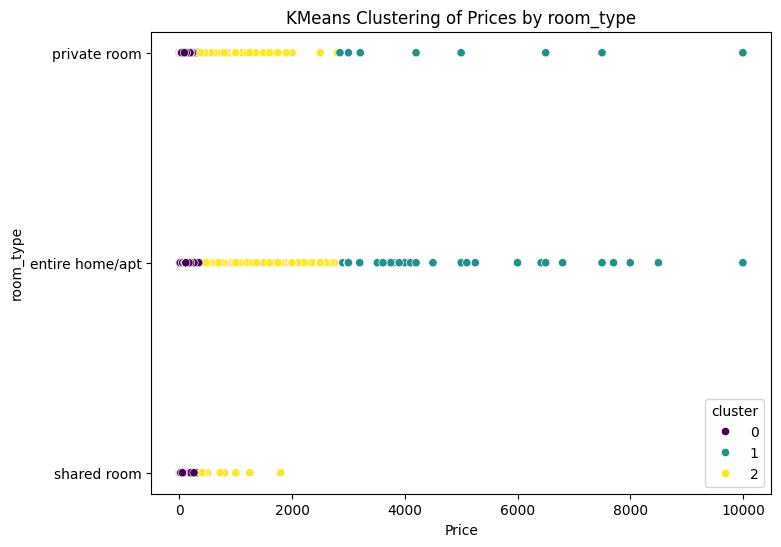

In [ ]:
# 6. KMeans Clustering

X = df[['price']]

kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(X)

cluster_summary = df.groupby('cluster')['price'].agg(['mean', 'count'])
print(cluster_summary)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='room_type', hue='cluster', data=df, palette='viridis')
plt.title('KMeans Clustering of Prices by room_type')
plt.xlabel('Price')
plt.ylabel('room_type')
plt.show()